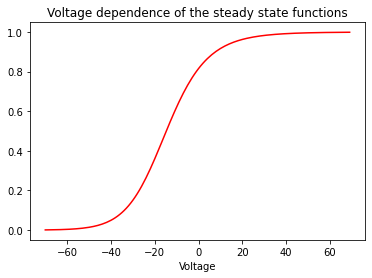

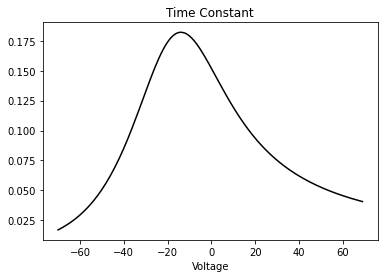

In [50]:
from numpy import exp
import matplotlib.pyplot as plt

'''
This is the code for problem 2 on the lab. This includes the alpha/beta functions, 
as well as the code for the steady state plot and time constant.
'''

def alpha_c(v):
    if v == -13:
        return - 0.3*(v+0.01 + 13)/ (exp(-0.1*(v+0.01 + 13)) - 1)
    else:
        return - 0.3*(v + 13)/ (exp(-0.1*(v + 13)) - 1)

def beta_c(v):
    return 10*exp(-1*(v + 38)/18)

def c_inf(v):
    output = []
    for i in v:
        x_inf = alpha_c(i) / (alpha_c(i) + beta_c(i))
        output.append(x_inf)
    return output

def tau_c(v):
    output = []
    for i in v:
        tau_c =  1 / (alpha_c(i) + beta_c(i))
        output.append(tau_c)
    return output

V = [i for i in range(-70,70)]
plt.figure()
plt.plot(V, c_inf(V), 'r', label = '$c_{\infty}(v)$')
plt.title('Voltage dependence of the steady state functions')
plt.xlabel('Voltage')
plt.show()

plt.figure()
plt.plot(V,  tau_c(V), 'black', label = 'tau_c(v)')
plt.title('Time Constant')
plt.xlabel('Voltage')
plt.show()

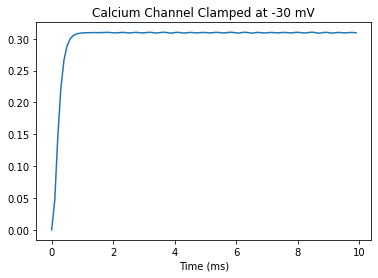

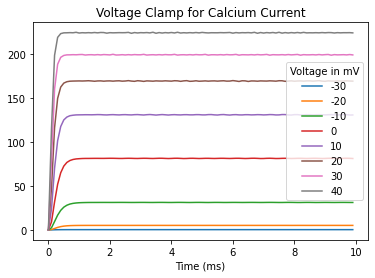

In [48]:
from scipy.integrate import solve_ivp
import numpy as np
'''
Code for problem 3
'''

def c_prime(c, v):
    '''This is returning the derivative of our gating-variable, can be rewritten in usual form'''
    return -1*(alpha_c(v) + beta_c(v))*c + alpha_c(v)

G_ca = 2
v_ca = -75
t = np.arange(0,10, 0.1)

def I_v(t, v):
    F = lambda t, c: c_prime(c, v)
    c = solve_ivp(F, [0, 10], [0], t_eval = t)
    I_ca = G_ca * c.y[0]**3 * (v - v_ca)
    return I_ca

plt.figure()
plt.plot(t, I_v(t, -30))
plt.title('Calcium Channel Clamped at -30 mV')
plt.xlabel('Time (ms)')
plt.show()

I_CA = [I_v(t, i) for i in range(-30, 50, 10)]
voltage = [i for i in range(-30, 50, 10)]
for i in I_CA:
    plt.plot(t, i)
plt.legend(voltage, loc = 'right', title = 'Voltage in mV')
plt.xlabel('Time (ms)')
plt.title('Voltage Clamp for Calcium Current')
plt.show()